In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [4]:
# fw_df_v = pd.read_csv("position_division_비긴팀_3개_자르기/포지션_FW_data_3개_자르기_비긴팀.csv")
fw_df= pd.read_csv("player_TopRate_position_JJINMAK/FW_combined.csv")

# fw_df = pd.concat([fw_df, fw_df_v])

In [6]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(dataframe):
    """
    주어진 데이터프레임의 VIF(분산 팽창 계수)를 계산.

    Args:
        dataframe (pd.DataFrame): 독립 변수들로 이루어진 데이터프레임.

    Returns:
        pd.DataFrame: 변수 이름과 해당 VIF 값.
    """
    # 상수항 추가 (회귀식의 절편을 고려하기 위함)
    X = add_constant(dataframe)
    
    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

fw_df_drop = fw_df.copy()
fw_df_drop = fw_df_drop.drop(columns= ['선수', "포지션_DF", "포지션_FW", "포지션_GK", "평점","포지션_MF", "isWin"])
# 예시 데이터
# df: 독립 변수들로 이루어진 데이터프레임
vif_result = calculate_vif(fw_df_drop)
vif_result = vif_result[vif_result['VIF'] < 7].reset_index(drop=True)
# VIF 결과 출력
# 내림차순 정렬
sorted_vif_result = sorted(vif_result, key=lambda x: x[1], reverse=True)

# 결과 출력
print(vif_result)
feature_list = vif_result['Feature'].tolist()


/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


         Feature       VIF
0           출전시간  3.479016
1             득점  2.247487
2             도움  1.308563
3          오프사이드  1.117201
4            프리킥  2.608257
5            코너킥  2.681229
6            스로인  1.206724
7         드리블 성공  3.240193
8     드리블 성공률(%)  3.076694
9         Ishome  1.096241
10      경합(지상)성공  2.224394
11  경합(지상)성공률(%)  1.531963
12      경합(공중)성공  2.344429
13  경합(공중)성공률(%)  1.515905
14          태클성공  3.432193
15      태클성공률(%)  3.118241
16          클리어링  1.269966
17          인터셉트  1.304415
18            차단  1.428530
19            획득  1.813691
20            블락  1.269479
21           볼미스  1.091940
22            파울  1.297442
23           피파울  1.252873
24            경고  1.159951
25            퇴장  1.033197
26      패스성공률(%)  6.249400
27           키패스  1.915725
28      공격진영패스성공  4.548347
29  공격진영패스성공률(%)  1.817614
30      수비진영패스성공  2.544562
31  수비진영패스성공률(%)  1.938581
32     롱패스성공률(%)  2.290950
33   중거리패스성공률(%)  2.217582
34     숏패스성공률(%)  4.854925
35    전진패스성공률(%)  2.106301
3

In [7]:
X = fw_df[feature_list]  # 피처 데이터
y = fw_df['isWin']
# 데이터 나누기

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

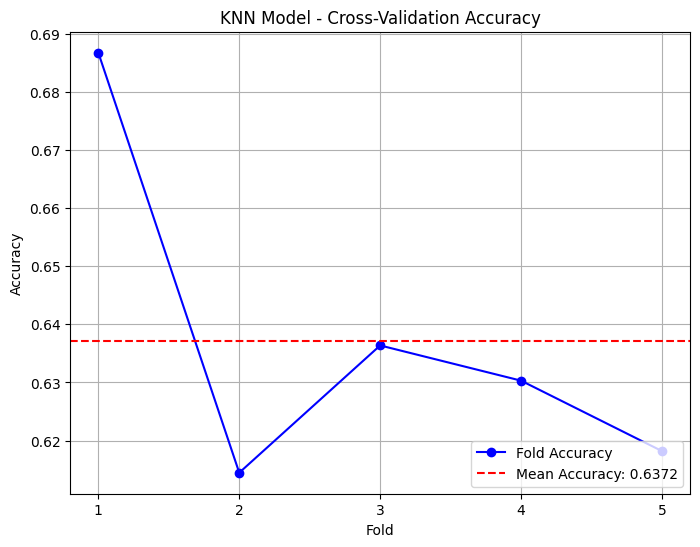

In [9]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# KNN 모델 정의 (k=5로 설정)
knn_model = KNeighborsClassifier(n_neighbors=2)

# 교차 검증 진행
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)

# 교차 검증 정확도의 평균
mean_accuracy = knn_scores.mean()

# 교차 검증 정확도 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), knn_scores, marker='o', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.title('KNN Model - Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()